In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import iqr

/Users/ahyeon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
subdata = load_data()
subdata_bm = subdata.biomarkers
subdata_oc = subdata.outcomes
subdata_bm_features = subdata.biomarker_features
subdata_oc_features = subdata.outcome_features

In [8]:
for ii,f in enumerate(subdata_oc_features):
    if 'CVLT' in f:
        print(f,ii)

CVLTTrial1RawScore_6mo 144
CVLTTrial1StandardScore_6mo 145
CVLTTrial2RawScore_6mo 146
CVLTTrial2StandardScore_6mo 147
CVLTTrial3RawScore_6mo 148
CVLTTrial3StandardScore_6mo 149
CVLTTrial4RawScore_6mo 150
CVLTTrial4StandardScore_6mo 151
CVLTTrial5RawScore_6mo 152
CVLTTrial5StandardScore_6mo 153
CVLTTrial1To5RawScore_6mo 154
CVLTTrial1To5StandardScore_6mo 155
CVLTTrialBRawScore_6mo 156
CVLTTrialBStandardScore_6mo 157
CVLTShortDelayFreeRecallRawScore_6mo 158
CVLTShortDelayFreeRecallStandardScore_6mo 159
CVLTShortDelayCuedRecallRawScore_6mo 160
CVLTShortDelayCuedRecallStandardScore_6mo 161
CVLTLongDelayFreeRecallRawScore_6mo 162
CVLTLongDelayFreeRecallStandardScore_6mo 163
CVLTLongDelayCuedRecallRawScore_6mo 164
CVLTLongDelayCuedRecallStandardScore_6mo 165
CVLTFreeRecallIntrusionsRaw_6mo 166
CVLTFreeRecallIntrusionsStandard_6mo 167
CVLTCuedRecallIntrusionsStandard_6mo 168
CVLTTotalIntrusionsRaw_6mo 169
CVLTTotalIntrusionsStandard_6mo 170
CVLTTotalRepetitionsRaw_6mo 171
CVLTTotalRepetitions

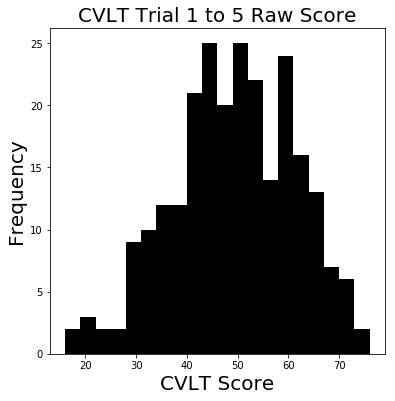

In [21]:
plt.figure(figsize=(6,6))
plt.hist(subdata_oc[:,154], color='black', bins=20)
plt.title('CVLT Trial 1 to 5 Raw Score', fontsize=20)
plt.xlabel('CVLT Score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/cvlt_hist.pdf')
plt.show()

In [2]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")


In [196]:
df = pd.DataFrame(fulldata.iloc[396])
print(df.to_string())

                                                                                               396
Unnamed: 0                                                                                 SF-1150
Age                                                                                             33
Sex                                                                                           Male
RaceAmericanIndian                                                                             Yes
RaceAlaskan                                                                                     No
RaceAmAl                                                                                       Yes
RaceAsian                                                                                       No
RaceBlack                                                                                       No
RaceHAPI                                                                                        No
RaceWhite 

In [ ]:
print(np.std(fulldata['CVLTShortDelayFreeRecallStandardScore_6mo'].dropna()))
print(np.std(fulldata['CVLTShortDelayFreeRecallRawScore_6mo'].dropna()))
print(np.std(fulldata['CVLTTrial4StandardScore_6mo'].dropna()))
print(np.std(fulldata['CVLTTrial4RawScore_6mo'].dropna()))
print(np.std(fulldata['CVLTCuedRecallIntrusionsStandard_6mo'].dropna()))
print(np.std(fulldata['CVLTCuedRecallIntrusionsRaw_6mo'].dropna()))
print(np.std(fulldata['CVLTTotalRecognitionHitsStandardScore_6mo'].dropna()))
print(np.std(fulldata['CVLTTotalRecognitionHitsRawScore_6mo'].dropna()))

In [204]:
print(np.mean(fulldata['CVLTShortDelayFreeRecallStandardScore_6mo'].dropna()))
print(np.mean(fulldata['CVLTShortDelayFreeRecallRawScore_6mo'].dropna()))
print(np.mean(fulldata['CVLTTrial4StandardScore_6mo'].dropna()))
print(np.mean(fulldata['CVLTTrial4RawScore_6mo'].dropna()))
print(np.mean(fulldata['CVLTCuedRecallIntrusionsStandard_6mo'].dropna()))
print(np.mean(fulldata['CVLTCuedRecallIntrusionsRaw_6mo'].dropna()))
print(np.mean(fulldata['CVLTTotalRecognitionHitsStandardScore_6mo'].dropna()))
print(np.mean(fulldata['CVLTTotalRecognitionHitsRawScore_6mo'].dropna()))

-0.0219594594595
10.1148648649
-0.183219178082
11.0445205479
0.0325342465753
1.5910652921
-0.215254237288
14.6237288136


In [3]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [4]:
names = ['CVLTTrial1To5RawScore_6mo','CVLTTrialBRawScore_6mo','CVLTShortDelayFreeRecallRawScore_6mo',
            'CVLTLongDelayFreeRecallRawScore_6mo','CVLTTotalRecognitionDiscriminabilityRawScore_6mo',
             'CVLTTotalIntrusionsRaw_6mo','CVLTTotalRepetitionsRaw_6mo']

In [5]:
data = fulldata.iloc[:,547]
data[data==42]
# data

5      42.0
155    42.0
159    42.0
339    42.0
354    42.0
381    42.0
383    42.0
416    42.0
Name: CVLTTrial1To5RawScore_6mo, dtype: float64

In [6]:
for idx, i in enumerate(fulldata.iloc[:,722]):
    if i == -1:
        print(idx)

396


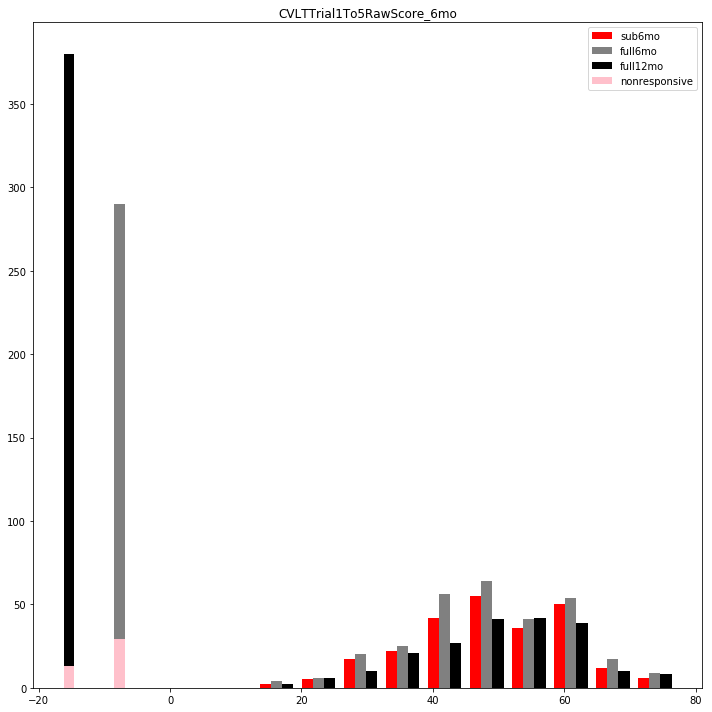

In [13]:
# CVLT first plot
sub6mo = [154,156,158,162,175,169,171]
full6mo = [547,549,551,555,569,563,718]
full12mo = [700,702,704,708,722,716,718]

fig, ax = plt.subplots(1,1, figsize=(10,10))


count = 0
x=154
y=547
z=700
sub = sub_oc[:,x]
full6 = fulldata.iloc[:,y]
full12 = fulldata.iloc[:,z]

dat = full6
dat2 = full12

num_na = dat.isna().sum()
num_na2 = dat2.isna().sum()
nonresponsive = 29
nonresponsive2 = 13

dat_dropna = dat.dropna()
dat2_dropna = dat2.dropna()

counts, bins, bars = ax.hist([sub, dat_dropna, dat2_dropna], color=['red','grey', 'black'], label=['sub6mo', 'full6mo', 'full12mo'], rwidth=0.8)
length = (bins[1]-bins[0])/4
ax.set_title('{}'.format(name))




mx = max(max(dat_dropna),max(dat2_dropna))
if count==5 or count==6:
    na_index = mx*(1+1/10) 
    na_index2 = mx*(1+2/10)
else:
    na_index = -1*mx*(1/10)
    na_index2 = -1*mx*(2/10)

ax.bar(na_index, nonresponsive, color='pink', label='nonresponsive', width=length)
ax.bar(na_index, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
ax.bar(na_index2, nonresponsive2, color='pink', width=length)
ax.bar(na_index2, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
ax.legend()
    

fig.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ misc/cvlt_hist1.pdf')

40.0 42.0
4.0 4.0
7.0 8.0
8.0 8.0
2.3 2.0
0.0 0.0
1.0 1.0


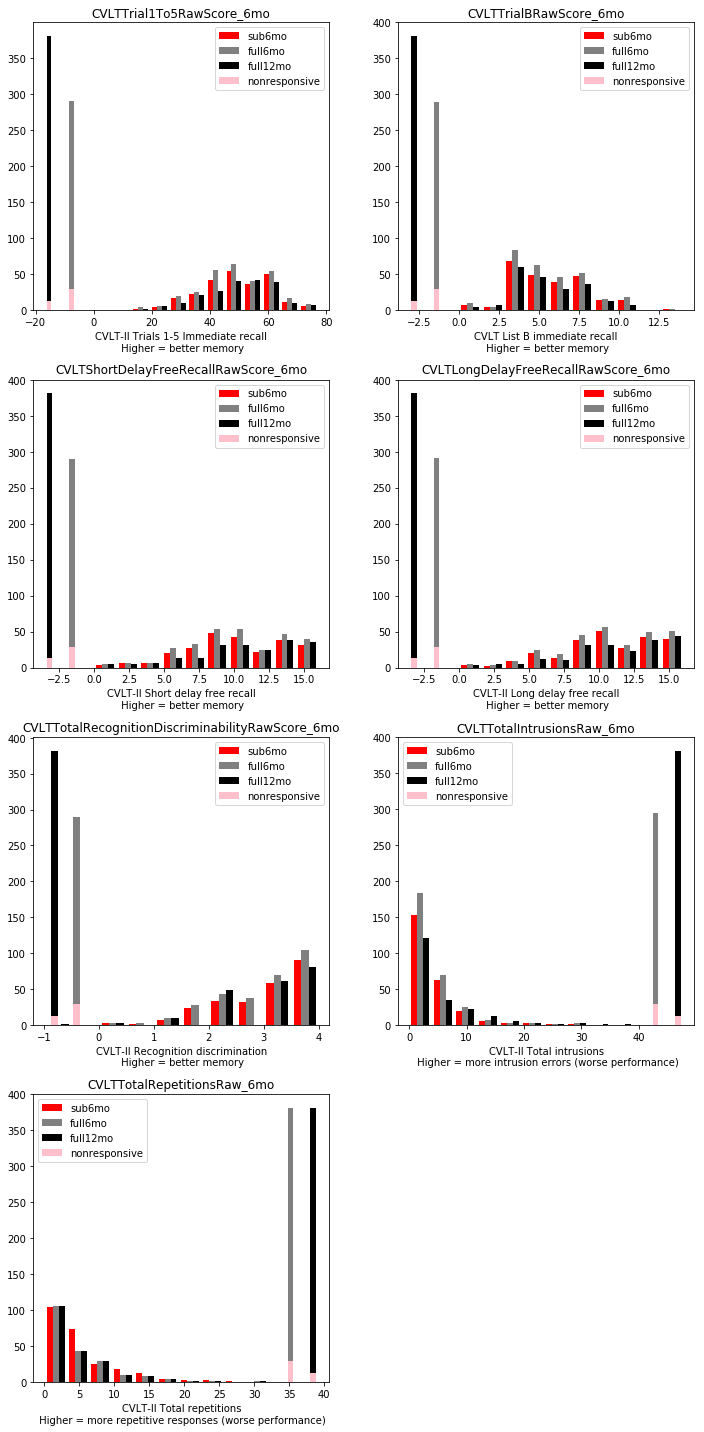

In [206]:
# CVLT summaries
sub6mo = [154,156,158,162,175,169,171]
full6mo = [547,549,551,555,569,563,718]
full12mo = [700,702,704,708,722,716,718]

fig, ax = plt.subplots(4,2, figsize=(10,20))
ax = ax.flatten()

count = 0
for x, y, z, name in zip(sub6mo, full6mo, full12mo, names):
    sub = sub_oc[:,x]
    full6 = fulldata.iloc[:,y]
    full12 = fulldata.iloc[:,z]

    dat = full6
    dat2 = full12
    
    num_na = dat.isna().sum()
    num_na2 = dat2.isna().sum()
    nonresponsive = 29
    nonresponsive2 = 13

    dat_dropna = dat.dropna()
    dat2_dropna = dat2.dropna()
    
    counts, bins, bars = ax[count].hist([sub, dat_dropna, dat2_dropna], color=['red','grey', 'black'], label=['sub6mo', 'full6mo', 'full12mo'], rwidth=0.8)
    length = (bins[1]-bins[0])/4
    ax[count].set_title('{}'.format(name))
    
    ax[7].set_visible(False)
    ax[0].set_xlabel('CVLT-II Trials 1-5 Immediate recall\n Higher = better memory')
    ax[1].set_xlabel('CVLT List B immediate recall\n Higher = better memory')
    ax[2].set_xlabel('CVLT-II Short delay free recall\n Higher = better memory')
    ax[3].set_xlabel('CVLT-II Long delay free recall\n Higher = better memory')
    ax[4].set_xlabel('CVLT-II Recognition discrimination\n Higher = better memory')
    ax[5].set_xlabel('CVLT-II Total intrusions\n Higher = more intrusion errors (worse performance)')
    ax[6].set_xlabel('CVLT-II Total repetitions\n Higher = more repetitive responses (worse performance)')

    
    mx = max(max(dat_dropna),max(dat2_dropna))
    if count==5 or count==6:
        na_index = mx*(1+1/10) 
        na_index2 = mx*(1+2/10)
    else:
        na_index = -1*mx*(1/10)
        na_index2 = -1*mx*(2/10)
 
    ax[count].bar(na_index, nonresponsive, color='pink', label='nonresponsive', width=length)
    ax[count].bar(na_index, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
    ax[count].bar(na_index2, nonresponsive2, color='pink', width=length)
    ax[count].bar(na_index2, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
    ax[count].legend()
    count += 1

fig.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ misc/cvlt_hist.pdf')

array([-2.78016407, -2.19975867, -1.61935327, -1.03894787, -0.45854247,
        0.12186294,  0.70226834,  1.28267374,  1.86307914,  2.44348455,
        3.02388995])

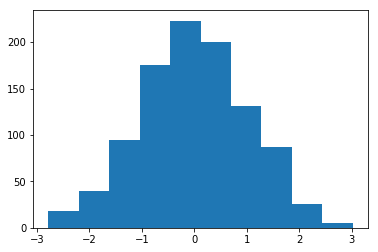

In [149]:
counts, bins, bars = plt.hist(np.random.randn(1000))
bins